In [1]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df  = pd.read_csv("/content/Bengaluru_House_Data.csv")
df1 = pd.read_csv("/content/car data.csv")
print(df.head())
print(df1.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.shape

(13320, 9)

In [ ]:
print(df.isnull().sum())
print("\n")
print(df1.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
size_length = df["size"].str.len()
size_length.head()

0    5.0
1    9.0
2    5.0
3    5.0
4    5.0
Name: size, dtype: float64

In [ ]:
size_len = pd.DataFrame(size_length)
size_len.head()

,size
0,5.0
1,9.0
2,5.0
3,5.0
4,5.0


In [ ]:
size_col =df["size"].str.split(expand=True)
size_col.rename(columns={0:"room",1:"hall"},inplace=True)

In [ ]:
size_len = pd.DataFrame(size_col)
size_len.head()

,room,hall
0,2,BHK
1,4,Bedroom
2,3,BHK
3,3,BHK
4,2,BHK


In [ ]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [ ]:
df["location"]=df["location"].fillna(df["location"].mode()[0])

In [ ]:
df["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

missing data at Random

In [ ]:
def impute_nan(df,feature,mode):
  df[feature+"_mode"] = df[feature].fillna(df[feature].mode()[0])

In [ ]:
def impute_nan(df,feature,median):
  df[feature+"_median"] = df[feature].fillna(median)

In [ ]:
mode = df["society"].mode()[0]

In [ ]:
impute_nan(df,"society",mode)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr


**Random sample imputation**

In [ ]:
df["society"].dropna().sample(df["society"].isnull().sum(),random_state=0)

6059     Adaveth
5940     Bhe 2ko
12305    Thesseg
3146     PintsAp
9236     Palleon
          ...   
1268     CharkGr
7109     Shitt S
11306    SLaceda
6885     Soiniy 
4890     Saityat
Name: society, Length: 5502, dtype: object

In [ ]:
df[df["society"].isnull()].index

Int64Index([    2,     4,     8,     9,    10,    13,    19,    20,    23,
               25,
            ...
            13302, 13303, 13305, 13306, 13307, 13310, 13311, 13312, 13316,
            13319],
           dtype='int64', length=5502)

In [ ]:
def impute_nan(df,feature):
  df[feature+"_random"] = df[feature]
  #it will have the random sample to fill na
  random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
  #python need to have some index in order to merge the dataset
  random_sample.index = df[df[feature].isnull()].index
  df.loc[df[feature].isnull(),feature+"_random"] = random_sample

In [ ]:
impute_nan(df,"society")

In [ ]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth


In [ ]:
df["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

balcony and bath

In [ ]:
df["bath"].value_counts()
df["bath"].median()

2.0

In [ ]:
def impute_nan(df,feature,median,mode):
  df[feature+"_mode"] = df[feature].fillna(mode)
  df[feature+"_median"] = df[feature].fillna(median)

In [ ]:
def imputee_nan(df,feature,mode):
  df[feature+"_mode"] = df[feature].fillna(df[feature].mode()[0])

In [ ]:
def impute_median(df,feature,median):
  df[feature+"_median"] = df[feature].fillna(df[feature].median())

In [ ]:
impute_median(df,"balcony","balcony")

In [ ]:
imputee_nan(df,"balcony","balcony")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0


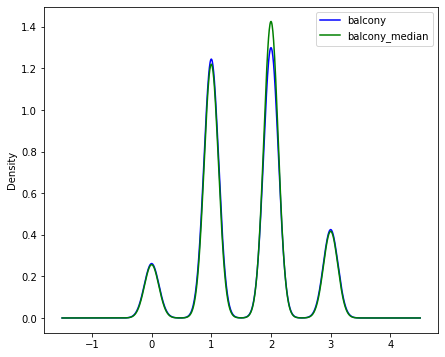

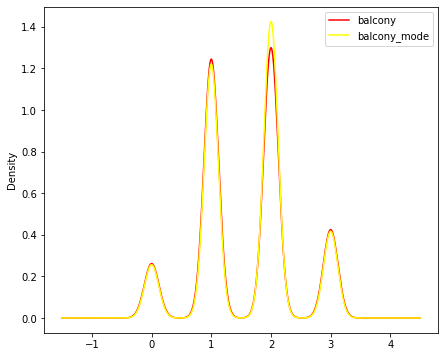

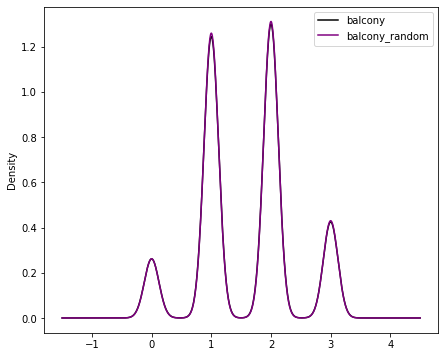

In [ ]:
plt.figure()
plt.subplot(131)
df["balcony"].plot(kind="kde",figsize=(24,6),color="blue")
df["balcony_median"].plot(kind="kde",color="green")
plt.legend()
plt.show()

plt.subplot(132)
df["balcony"].plot(kind="kde",figsize=(24,6),color="red")
df["balcony_mode"].plot(kind="kde",color="yellow")
plt.legend()
plt.show()
    
plt.subplot(133)
df["balcony"].plot(kind="kde",figsize=(24,6),color="black")
df["balcony_random"].plot(kind="kde",color="purple")
plt.legend()
plt.show()

In [ ]:
def imput_nan(df,feature):
  df[feature+"_random"] = df[feature]
  #random sample to fill na
  random_val = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
  #index of sample to merge the dataset
  random_val.index = df[df[feature].isnull()].index
  df.loc[df[feature].isnull(),feature+"_random"]= random_val

In [ ]:
imput_nan(df,"balcony")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0


Random sample imputation plot

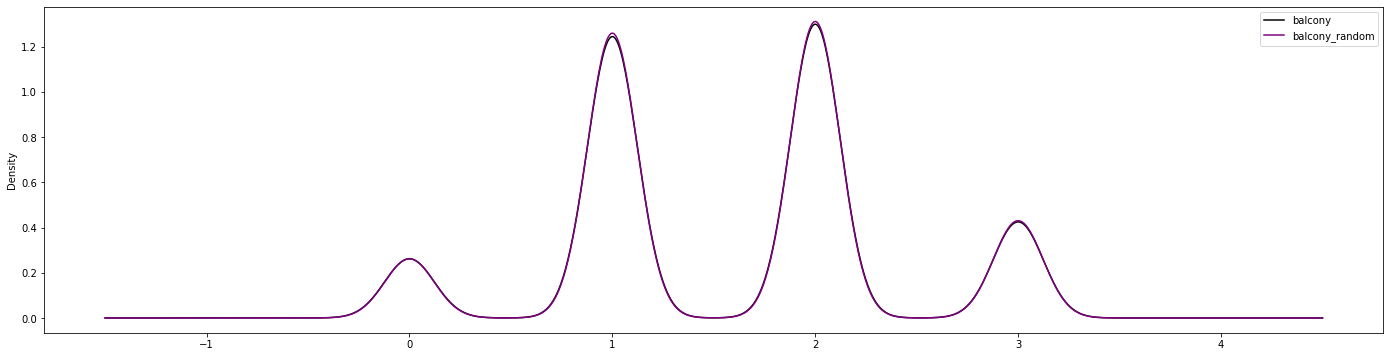

In [ ]:
df["balcony"].plot(kind="kde",figsize=(24,6),color="black")
df["balcony_random"].plot(kind="kde",color="purple")
plt.legend()
plt.show()

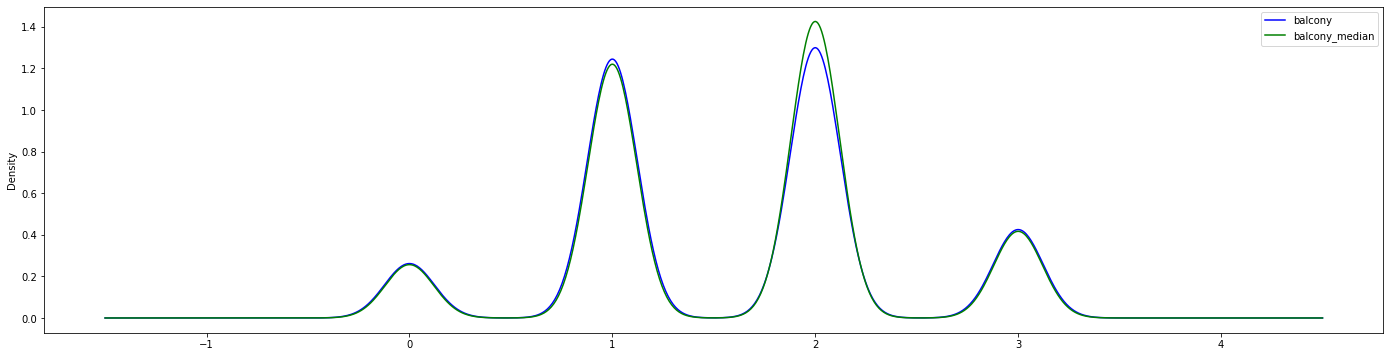

In [ ]:
df["balcony"].plot(kind="kde",figsize=(24,6),color="blue")
df["balcony_median"].plot(kind="kde",color="green")
plt.legend()
plt.show()

filling the nan values of bath using random sample imputation

In [ ]:
def impute_bath(df,feature):
  df[feature+"_random"] = df[feature]
  random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
  random_sample.index = df[df[feature].isnull()].index
  df.loc[df[feature].isnull(),feature+"_random"]=random_sample

In [ ]:
impute_bath(df,"bath")

In [ ]:
imputee_nan(df,"bath","bath")
impute_median(df,"bath","bath")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0


In [ ]:
df["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [ ]:
df["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

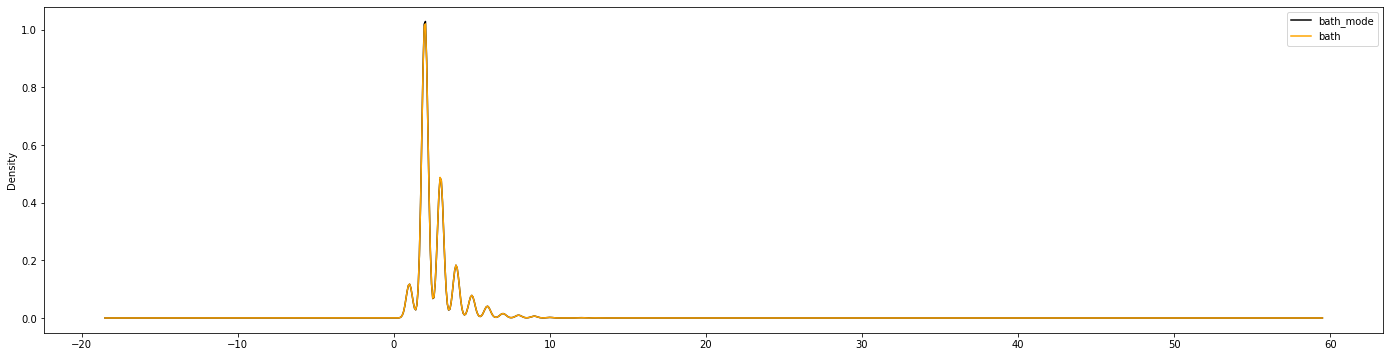

In [ ]:
plt.figure()
df["bath_mode"].plot(kind="kde",figsize=(24,6),color="black")
df["bath"].plot(kind="kde",color="orange")
plt.legend()
plt.show()

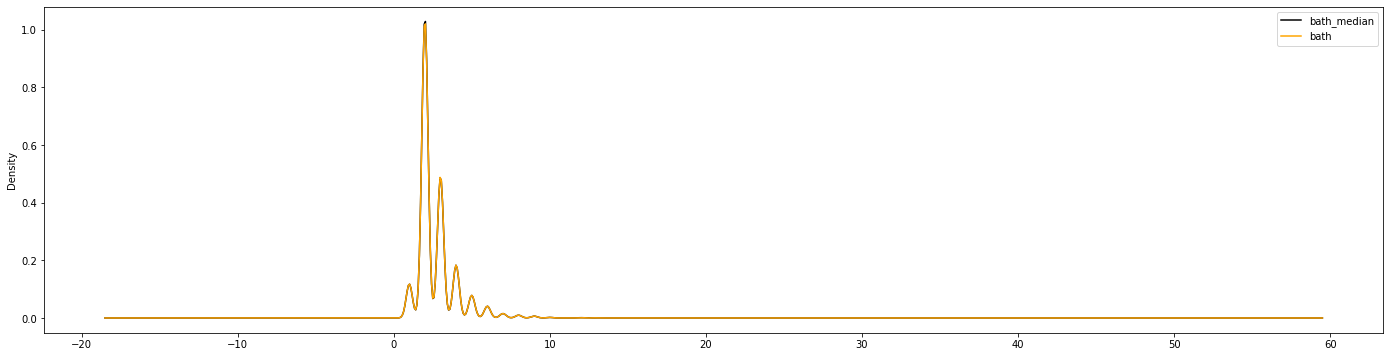

In [ ]:
plt.figure()
df["bath_median"].plot(kind="kde",figsize=(24,6),color="black")
df["bath"].plot(kind="kde",color="orange")
plt.legend()
plt.show()

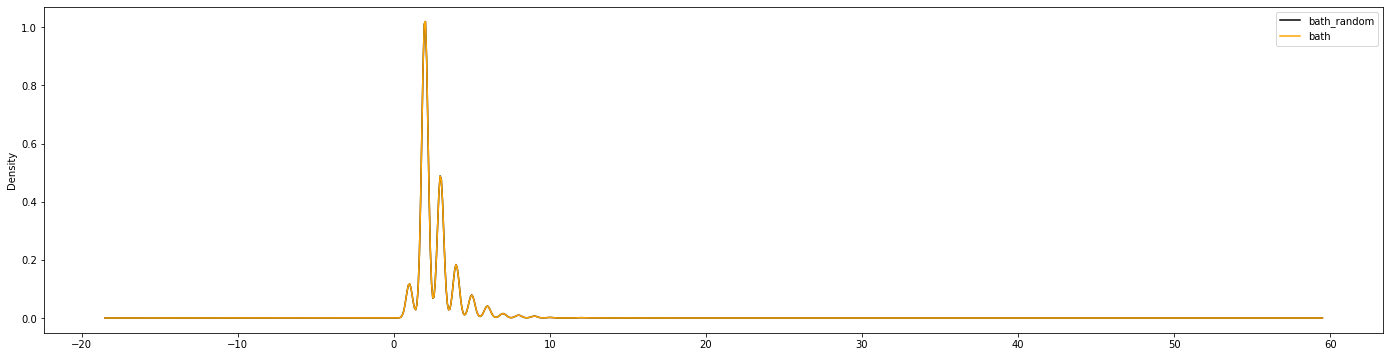

In [ ]:
plt.figure()
df["bath_random"].plot(kind="kde",figsize=(24,6),color="black")
df["bath"].plot(kind="kde",color="orange")
plt.legend()
plt.show()

In [ ]:
df["bath"].value_counts()

In [ ]:
df["bath"].isnull().sum()

73

In [ ]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                16
society           5502
total_sqft           0
bath                73
balcony            609
price                0
society_median       0
society_random       0
balcony_median       0
balcony_random       0
bath_random          0
bath_mode            0
bath_median          0
balcony_mode         0
dtype: int64

3. **Capturing NaN values with new features**

In [ ]:
size_nan = np.where(df["size"].isnull(),1,0)

In [ ]:
df["size_nan"]= size_nan

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median,balcony_mode,size_nan
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0,1.0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0,3.0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0,3.0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0,1.0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0,1.0,0


In [ ]:
df["size"].isnull().sum()

16

In [ ]:
df["size_nan"].value_counts()

0    13304
1       16
Name: size_nan, dtype: int64

In [ ]:
society_nan = np.where(df["society"].isnull(),1,0)

In [ ]:
df["society_nan"] = society_nan

In [ ]:
df["society_nan"].value_counts()

0    7818
1    5502
Name: society_nan, dtype: int64

**End of Distribution imputation**

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median,balcony_mode,size_nan,society_nan
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0,1.0,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0,3.0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0,3.0,0,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0,1.0,0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0,1.0,0,1


In [ ]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                16
society           5502
total_sqft           0
bath                73
balcony            609
price                0
society_median       0
society_random       0
balcony_median       0
balcony_random       0
bath_random          0
bath_mode            0
bath_median          0
balcony_mode         0
size_nan             0
society_nan          0
dtype: int64

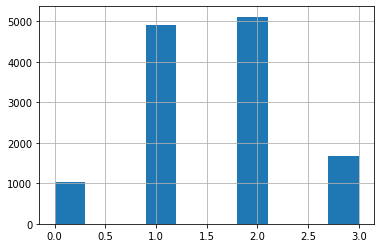

In [ ]:
df["balcony"].hist()

In [ ]:
extreme = df["balcony"].mean()+3*df["balcony"].std()
print(extreme)

4.036166027310754


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


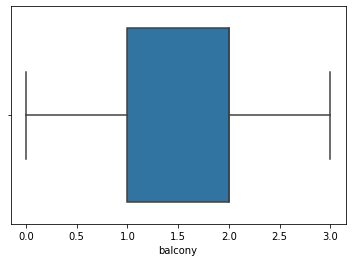

In [ ]:
sns.boxplot(df["balcony"])

In [ ]:
def impute_nan(df,feature,median,extreme):
  df[feature+"_end_distribution"] = df[feature].fillna(extreme)
  df[feature].fillna(df[feature].median())

In [ ]:
impute_nan(df,"balcony","balcony",extreme)

In [ ]:
df.isnull().sum()

area_type                      0
availability                   0
location                       0
size                          16
society                     5502
total_sqft                     0
bath                          73
balcony                      609
price                          0
society_median                 0
society_random                 0
balcony_median                 0
balcony_random                 0
bath_random                    0
bath_mode                      0
bath_median                    0
balcony_mode                   0
size_nan                       0
society_nan                    0
balcony_end_distribution       0
dtype: int64

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median,balcony_mode,size_nan,society_nan,balcony_end_distribution
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0,1.0,0,0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0,3.0,0,0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0,3.0,0,1,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0,1.0,0,0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0,1.0,0,1,1.0


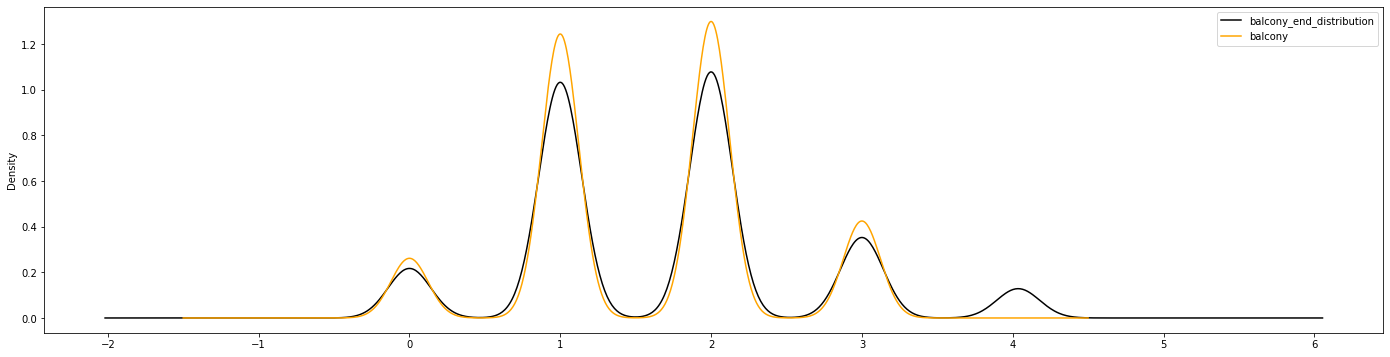

In [ ]:
plt.figure()
df["balcony_end_distribution"].plot(kind="kde",figsize=(24,6),color="black")
df["balcony"].plot(kind="kde",color="orange")
plt.legend()
plt.show()

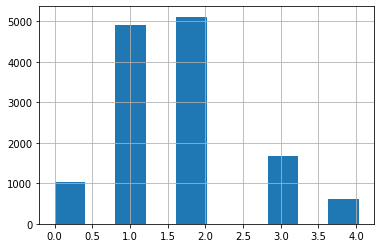

In [ ]:
df["balcony_end_distribution"].hist()

In [ ]:
df.isnull().sum()

area_type                      0
availability                   0
location                       0
size                          16
society                     5502
total_sqft                     0
bath                          73
balcony                      609
price                          0
society_median                 0
society_random                 0
balcony_median                 0
balcony_random                 0
bath_random                    0
bath_mode                      0
bath_median                    0
balcony_mode                   0
size_nan                       0
society_nan                    0
balcony_end_distribution       0
dtype: int64

In [ ]:
df["society"].mean()+3*df["society"].std()

In [ ]:
def imput_nan(df,feature):
  df[feature+"_zero"] = df[feature].fillna(0)
  df[feature+"_hundered"] = df[feature].fillna(100)

In [ ]:
imput_nan(df,"balcony")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median,balcony_mode,size_nan,society_nan,balcony_end_distribution,balcony_zero,balcony_hundered
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0,1.0,0,0,1.0,1.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0,3.0,0,0,3.0,3.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0,3.0,0,1,3.0,3.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0,1.0,0,0,1.0,1.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0,1.0,0,1,1.0,1.0,1.0


In [ ]:
df.nunique()

area_type                      4
availability                  81
location                    1305
size                          31
society                     2688
total_sqft                  2117
bath                          19
balcony                        4
price                       1994
society_median              2688
society_random              2688
balcony_median                 4
balcony_random                 4
bath_random                   19
bath_mode                     19
bath_median                   19
balcony_mode                   4
size_nan                       2
society_nan                    2
balcony_end_distribution       5
balcony_zero                   4
balcony_hundered               5
dtype: int64

**handling categorical missing values**

In [ ]:
df["size"].value_counts()

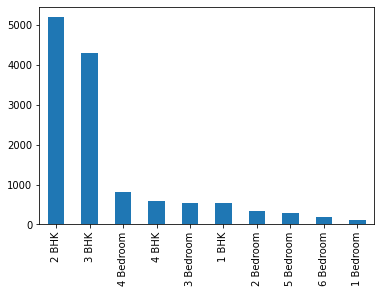

In [ ]:
df["size"].value_counts().sort_values(ascending=False).head(10).plot.bar()

In [ ]:
def impute_cat(df,feature):
  df[feature+"_mode"] = df[feature].fillna(df[feature].mode()[0])

In [ ]:
for column in ["size"]:
  impute_cat(df,column)

In [ ]:
df.isnull().sum().head()

area_type          0
availability       0
location           0
size              16
society         5502
dtype: int64

**Adding variable to capture NaN**

In [ ]:
df["size_nan"] = np.where(df["size"].isnull(),1,0)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,society_median,society_random,balcony_median,balcony_random,bath_random,bath_mode,bath_median,balcony_mode,size_nan,society_nan,balcony_end_distribution,balcony_zero,balcony_hundered,size_mode
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Coomee,Coomee,1.0,1.0,2.0,2.0,2.0,1.0,0,0,1.0,1.0,1.0,2 BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Theanmp,Theanmp,3.0,3.0,5.0,5.0,5.0,3.0,0,0,3.0,3.0,3.0,4 Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,GrrvaGr,Adaveth,3.0,3.0,2.0,2.0,2.0,3.0,0,1,3.0,3.0,3.0,3 BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Soiewre,Soiewre,1.0,1.0,3.0,3.0,3.0,1.0,0,0,1.0,1.0,1.0,3 BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,GrrvaGr,Bhe 2ko,1.0,1.0,2.0,2.0,2.0,1.0,0,1,1.0,1.0,1.0,2 BHK


**if we have more NaN frequent categories,we just replace Nan with a new category**

In [ ]:
def impute_cat(df,feature):
  df["missing_"+feature] = np.where(df[feature].isnull(),"missing",df[feature])

In [ ]:
impute_cat(df,"size")

In [ ]:
df["missing_size"].value_counts()

**handling categorical features**

**one hot encoding**

In [ ]:
df.nunique()

area_type                      4
availability                  81
location                    1305
size                          31
society                     2688
total_sqft                  2117
bath                          19
balcony                        4
price                       1994
society_median              2688
society_random              2688
balcony_median                 4
balcony_random                 4
bath_random                   19
bath_mode                     19
bath_median                   19
balcony_mode                   4
size_nan                       2
society_nan                    2
balcony_end_distribution       5
balcony_zero                   4
balcony_hundered               5
size_mode                     31
missing_size                  32
dtype: int64

In [ ]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
pd.get_dummies(df["area_type"],drop_first=True)

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13315,0,0,0
13316,0,0,1
13317,0,0,0
13318,0,0,1


**Onehotencoding with many categories in a feature**

In [5]:
df1 = pd.read_csv("/content/mercedes.csv")

In [6]:
df1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for col in df1.columns:
  print(col,":",len(df1[col].unique()),"labels")

In [8]:
df1.shape

(4209, 378)

In [9]:
pd.get_dummies(df1,drop_first=True).shape

(4209, 557)

**if there are more than 100 unique values in categorical features then?**

we take 10 most frequent variables and if the 10 most frequent is present in the data then we will take it as 1 else 0

In [11]:
df1["X2"].nunique()

44

In [16]:
df1["X2"].value_counts().sort_values(ascending=False).head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [19]:
#lets make a list of top10 with the most frequent categories of the variable
top_10 = [x for x in df1.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [ ]:
#and now we make the 10 binary variables
for label in top_10:
  df1[label] = np.where(df1["X2"]==label,1,0)

df1[["X2"]+top_10].head(30)

In [ ]:
df1.head()

In [30]:
#get whole set of dummy variabes,for all the categorical varables
def one_hot_top_x(df1,variable,top_x_labels):
  #function to create the dummy variabels for the most frequent labels
  #we can vary the no.of most frequent labels that we encode
  for label in top_x_labels:
    df1[variable+"_"+label] = np.where(df1[variable]==label,1,0)

df1 = pd.read_csv("/content/mercedes.csv",usecols=["X1","X2","X3","X4","X5","X6"])

#encode x2 into the 10 most frequent categories
one_hot_top_x(df1,"X2",top_10)

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [31]:
df1.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [32]:
df1.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [34]:
df1["X1"].nunique()

27

In [37]:
top10 =[i for i in df1["X1"].value_counts().sort_values(ascending=False).head(10).index]
top10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [38]:
for col in top10:
  df1[col] = np.where(df1["X1"]==col,1,0) 

In [39]:
df1.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,aa,s,b,l,v,r,i,a,c,o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
#making 10 binary variables
df1[["X1"]+top10]

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,s,0,1,0,0,0,0,0,0,0,0
4205,o,0,0,0,0,0,0,0,0,0,1
4206,v,0,0,0,0,1,0,0,0,0,0
4207,r,0,0,0,0,0,1,0,0,0,0


In [44]:
#function to make many categroical dummy variable at once
def one_hot_top_10(df,feature,top_x_label):
  for col in top_x_label:
    df[feature+"_"+col] = np.where(df[feature]==col,1,0)

In [48]:
top_10 = [i for i in df1["X1"].value_counts().sort_values(ascending=False).head(10).index]
top_10

one_hot_top_10(df1,"X1",top_10)

In [49]:
df1.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
def one_hot_top_x(df,feature,top_10_label):
  for col in top_10_label:
    df[feature+"_"+col] = np.where(df[feature]==col,1,0)

In [58]:
df1["X3"].value_counts()

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

making top3 categorical values as 1 and other as 0.

In [60]:
top_10 = [i for i in df1.X3.value_counts().sort_values(ascending=False).head(3).index]
top_10
one_hot_top_x(df1,"X3",top_10)

In [61]:
df1.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o,X3_c,X3_f,X3_a
0,v,at,a,d,u,j,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,v,n,f,d,h,d,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [63]:
df1["X6"].value_counts()

g    1042
j    1039
d     625
i     488
l     478
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

In [66]:
top_10 = [i for i in df1.X6.value_counts().sort_values(ascending=False).head(5).index]
top_10
one_hot_top_x(df1,"X6",top_10)

In [67]:
df1.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X3_f,X3_a,X6_c,X6_f,X6_a,X6_d,X6_g,X6_j,X6_i,X6_l
0,v,at,a,d,u,j,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,t,n,f,d,x,l,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,v,n,f,d,h,d,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


**Advantags**

1. Straight forward to implement
2. Does not require hrs of variable exploration
3. Does not expand massively the feature space(number of columns in the dataset)

**Disadvantages**

1. Doesnt add any information that may make the varialbe more predictive
2. Doesnt not keep the information of the ignored labels